In [1]:
# your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/workspaces/machine-learning-python-template/data/raw/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
#Obtain dimensions
df.shape

(48895, 16)

In [4]:
#Obtain information about data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
#Drop duplicated values
df.drop("id", axis = 1).duplicated().sum()

np.int64(0)

In [7]:
df.drop("host_id", axis = 1).duplicated().sum()

np.int64(0)

No duplicates were found

In [8]:
#Eliminate irrelevant informaction (id, name, host_id & host_name in columns)
df.drop(["id", "host_name", "name", "host_id"], axis = 1, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     38843 non-null  object 
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(

In [10]:
df.shape

(48895, 12)

In [11]:
df_numerical = df.select_dtypes(include=[int, float])
df_categorical = df.select_dtypes(include=["O"])

In [12]:
df_numerical.head(3)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365


In [13]:
df_categorical.head(3)

,neighbourhood_group,neighbourhood,room_type,last_review
0,Brooklyn,Kensington,Private room,2018-10-19
1,Manhattan,Midtown,Entire home/apt,2019-05-21
2,Manhattan,Harlem,Private room,NaN


/tmp/ipykernel_1825/3883605772.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0, 1].set_xticklabels(axis[0, 1].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_1825/3883605772.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[1, 1].set_xticklabels(axis[1, 1].get_xticklabels(), rotation=45, ha='right')


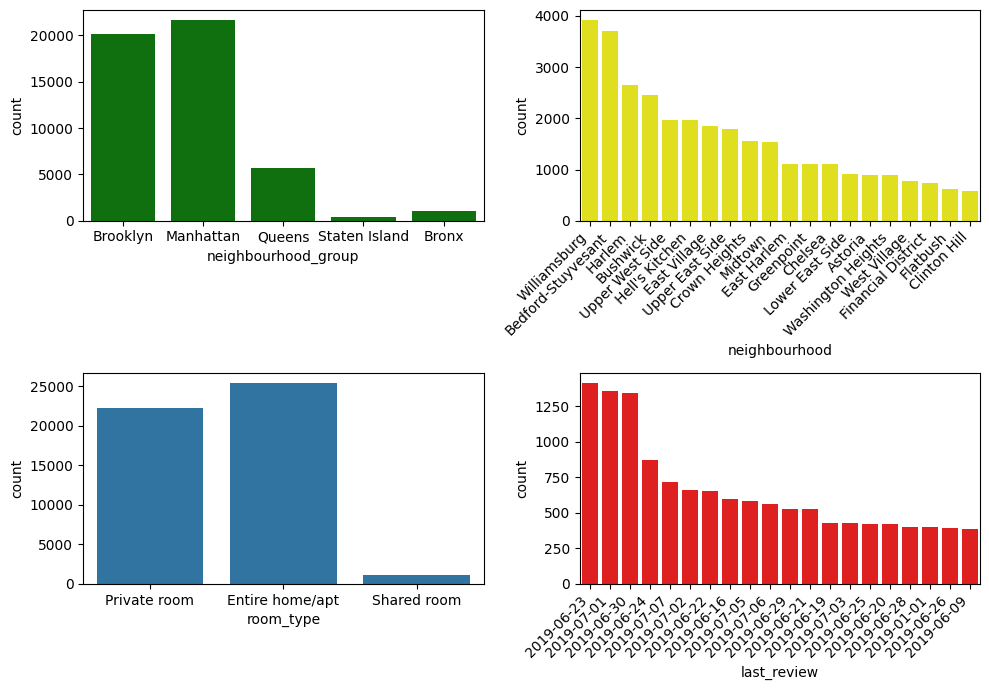

In [14]:
#Plotting Categorical Data

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

#Countplot for Neighbourhood groups
sns.countplot(ax = axis[0, 0], data = df, x = "neighbourhood_group", color="green")

#Top 20 neighbourhoods with AirBnb listings
sns.countplot(ax = axis[0, 1], data = df, x = "neighbourhood", order=df["neighbourhood"].value_counts().index[:20], color= "yellow")
axis[0, 1].set_xticklabels(axis[0, 1].get_xticklabels(), rotation=45, ha='right')

#Countplot for Neighbourhood groups
sns.countplot(ax = axis[1, 0], data = df, x = "room_type")

#Top 20 last reviewing dates
sns.countplot(ax = axis[1, 1], data = df, x = "last_review",color="red", order=df["last_review"].value_counts().index[:20])
axis[1, 1].set_xticklabels(axis[1, 1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()

plt.show()

In [15]:
df_numerical.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

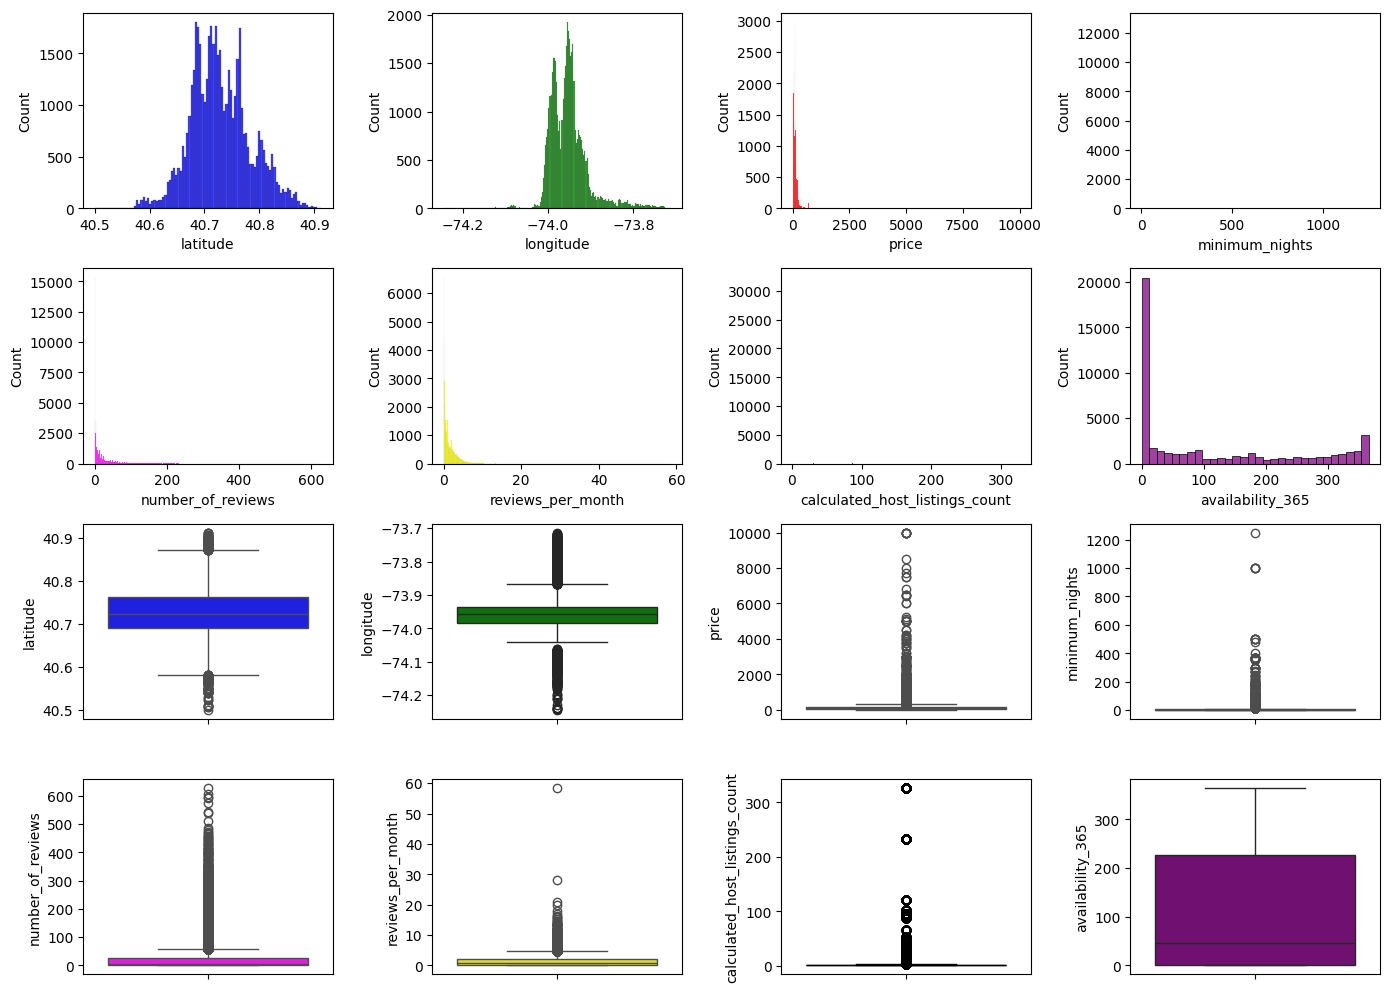

In [16]:
#Plotting Quantitative Data
fig, axis = plt.subplots(4, 4, figsize=(14, 10))
count = 0
colors = ["blue", "green", "red", "cyan", "magenta", "yellow", "black", 
          "purple", "orange", "pink", "brown", "gray", "olive", "gold", "navy", "teal"]

for i in range(2):  # Adjusted to avoid index out of bounds
    for j in range(4):
        if count < len(df_numerical.columns):
            sns.histplot(ax=axis[i, j], data=df, x=df_numerical.columns[count], color=colors[count])
            sns.boxplot(ax=axis[i+2, j], data=df, y=df_numerical.columns[count], color=colors[count])
            count += 1

plt.tight_layout()

<Axes: >

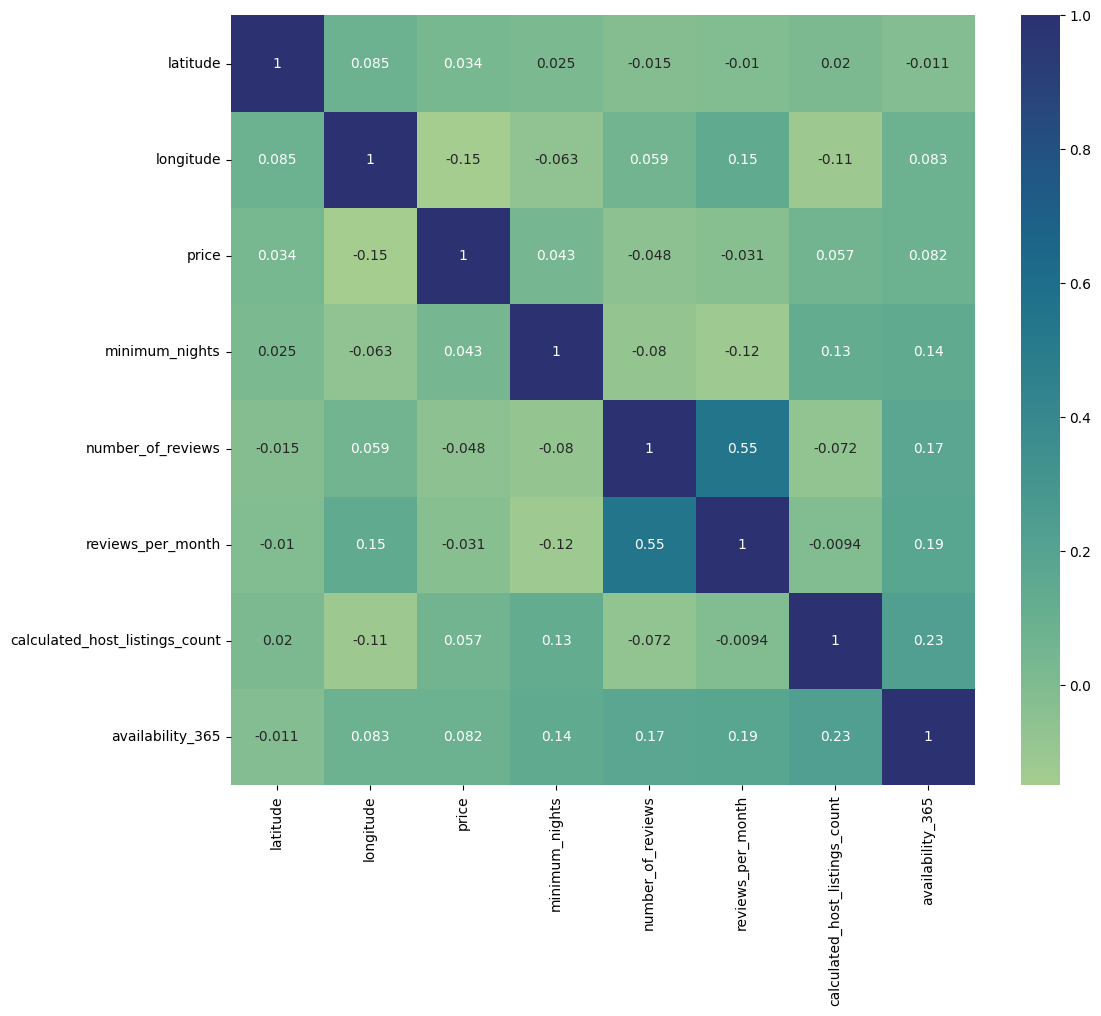

In [17]:
#Correlations between the variables in the quantitative data
plt.subplots(figsize=(12,10))
sns.heatmap(df_numerical.corr(),annot=True, cmap="crest")


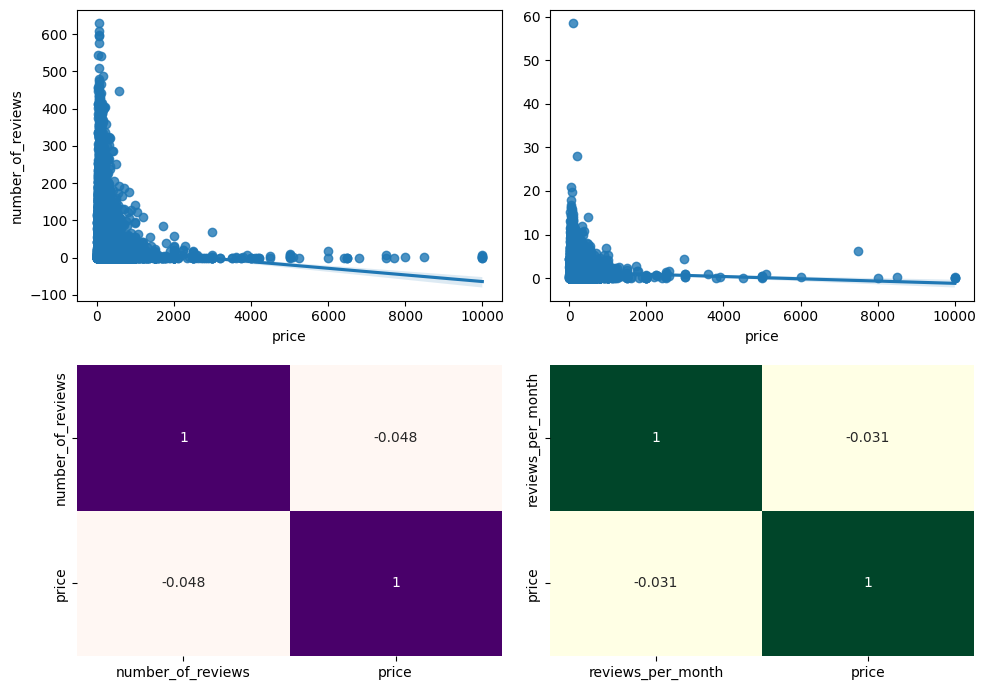

In [18]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Createing a multiple regressions and heatmaps
sns.regplot(ax = axis[0, 0], data = df_numerical, x = "price", y = "number_of_reviews")
sns.heatmap(df_numerical[["number_of_reviews", "price"]].corr(), annot = True, ax = axis[1, 0], cbar = False, cmap = "RdPu")
sns.regplot(ax = axis[0, 1], data = df_numerical, x = "price", y = "reviews_per_month").set(ylabel=None)
sns.heatmap(df_numerical[["reviews_per_month", "price"]].corr(), annot = True,  ax = axis[1, 1], cbar=False, cmap="YlGn")

# Adjusting the layout
plt.tight_layout()

#Plotting
plt.show()

In [19]:
df_categorical.columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'last_review'], dtype='object')

/tmp/ipykernel_1825/4084040435.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_1825/4084040435.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[2].set_xticklabels(axis[1].get_xticklabels(), rotation=45, ha='right')


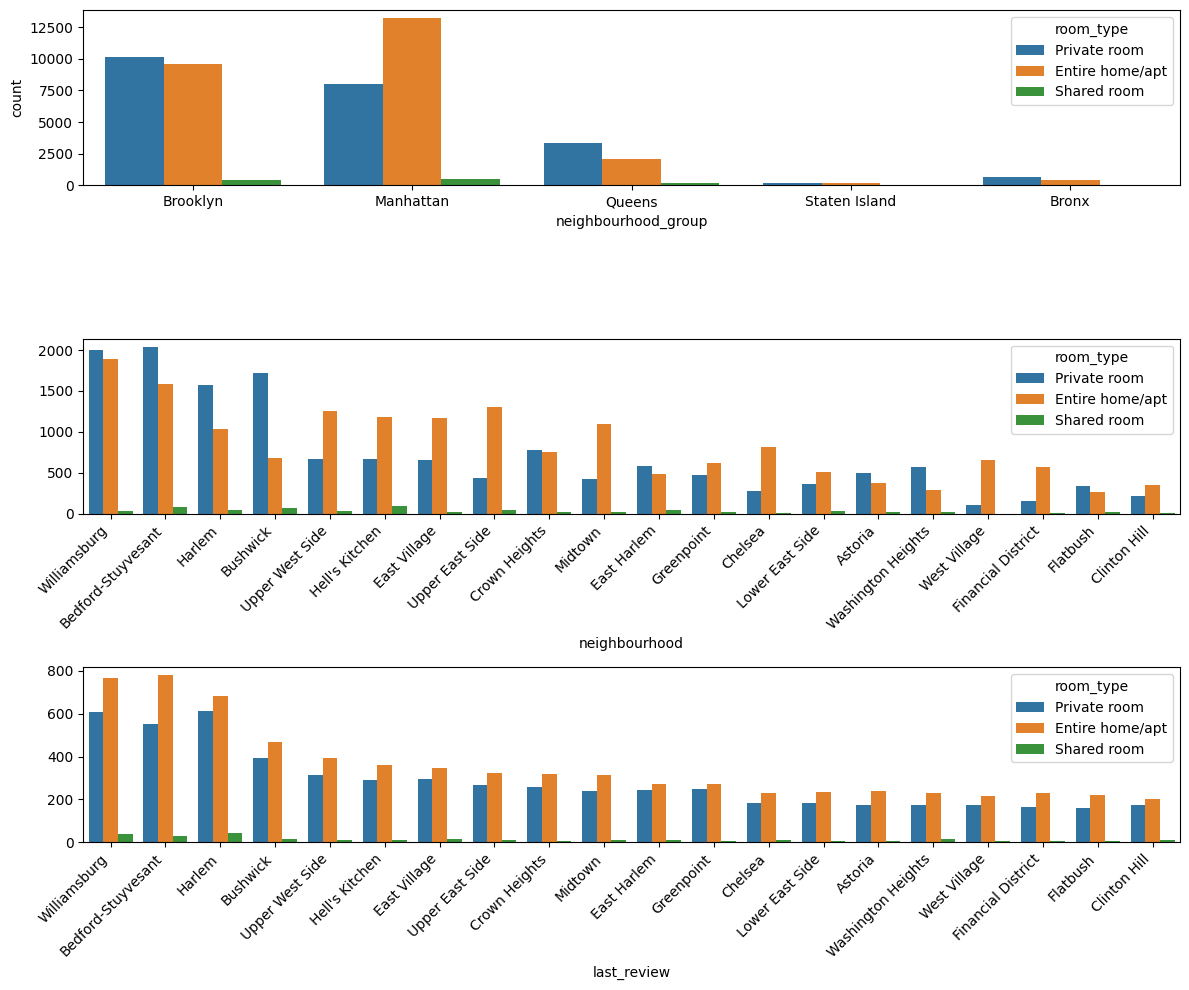

In [20]:
#Analyzing categorical data by types of rooms
fig, axis = plt.subplots(3,1 , figsize = (12, 10))

sns.countplot(ax = axis[0], data = df_categorical, x = "neighbourhood_group", hue = "room_type")
sns.countplot(ax = axis[1], data = df_categorical, x = "neighbourhood", hue = "room_type", order=df["neighbourhood"].value_counts().index[:20]).set(ylabel = None)
axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation=45, ha='right')
sns.countplot(ax = axis[2], data = df_categorical, x = "last_review", hue = "room_type", order=df["last_review"].value_counts().index[:20]).set(ylabel = None,)
axis[2].set_xticklabels(axis[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()

plt.show()

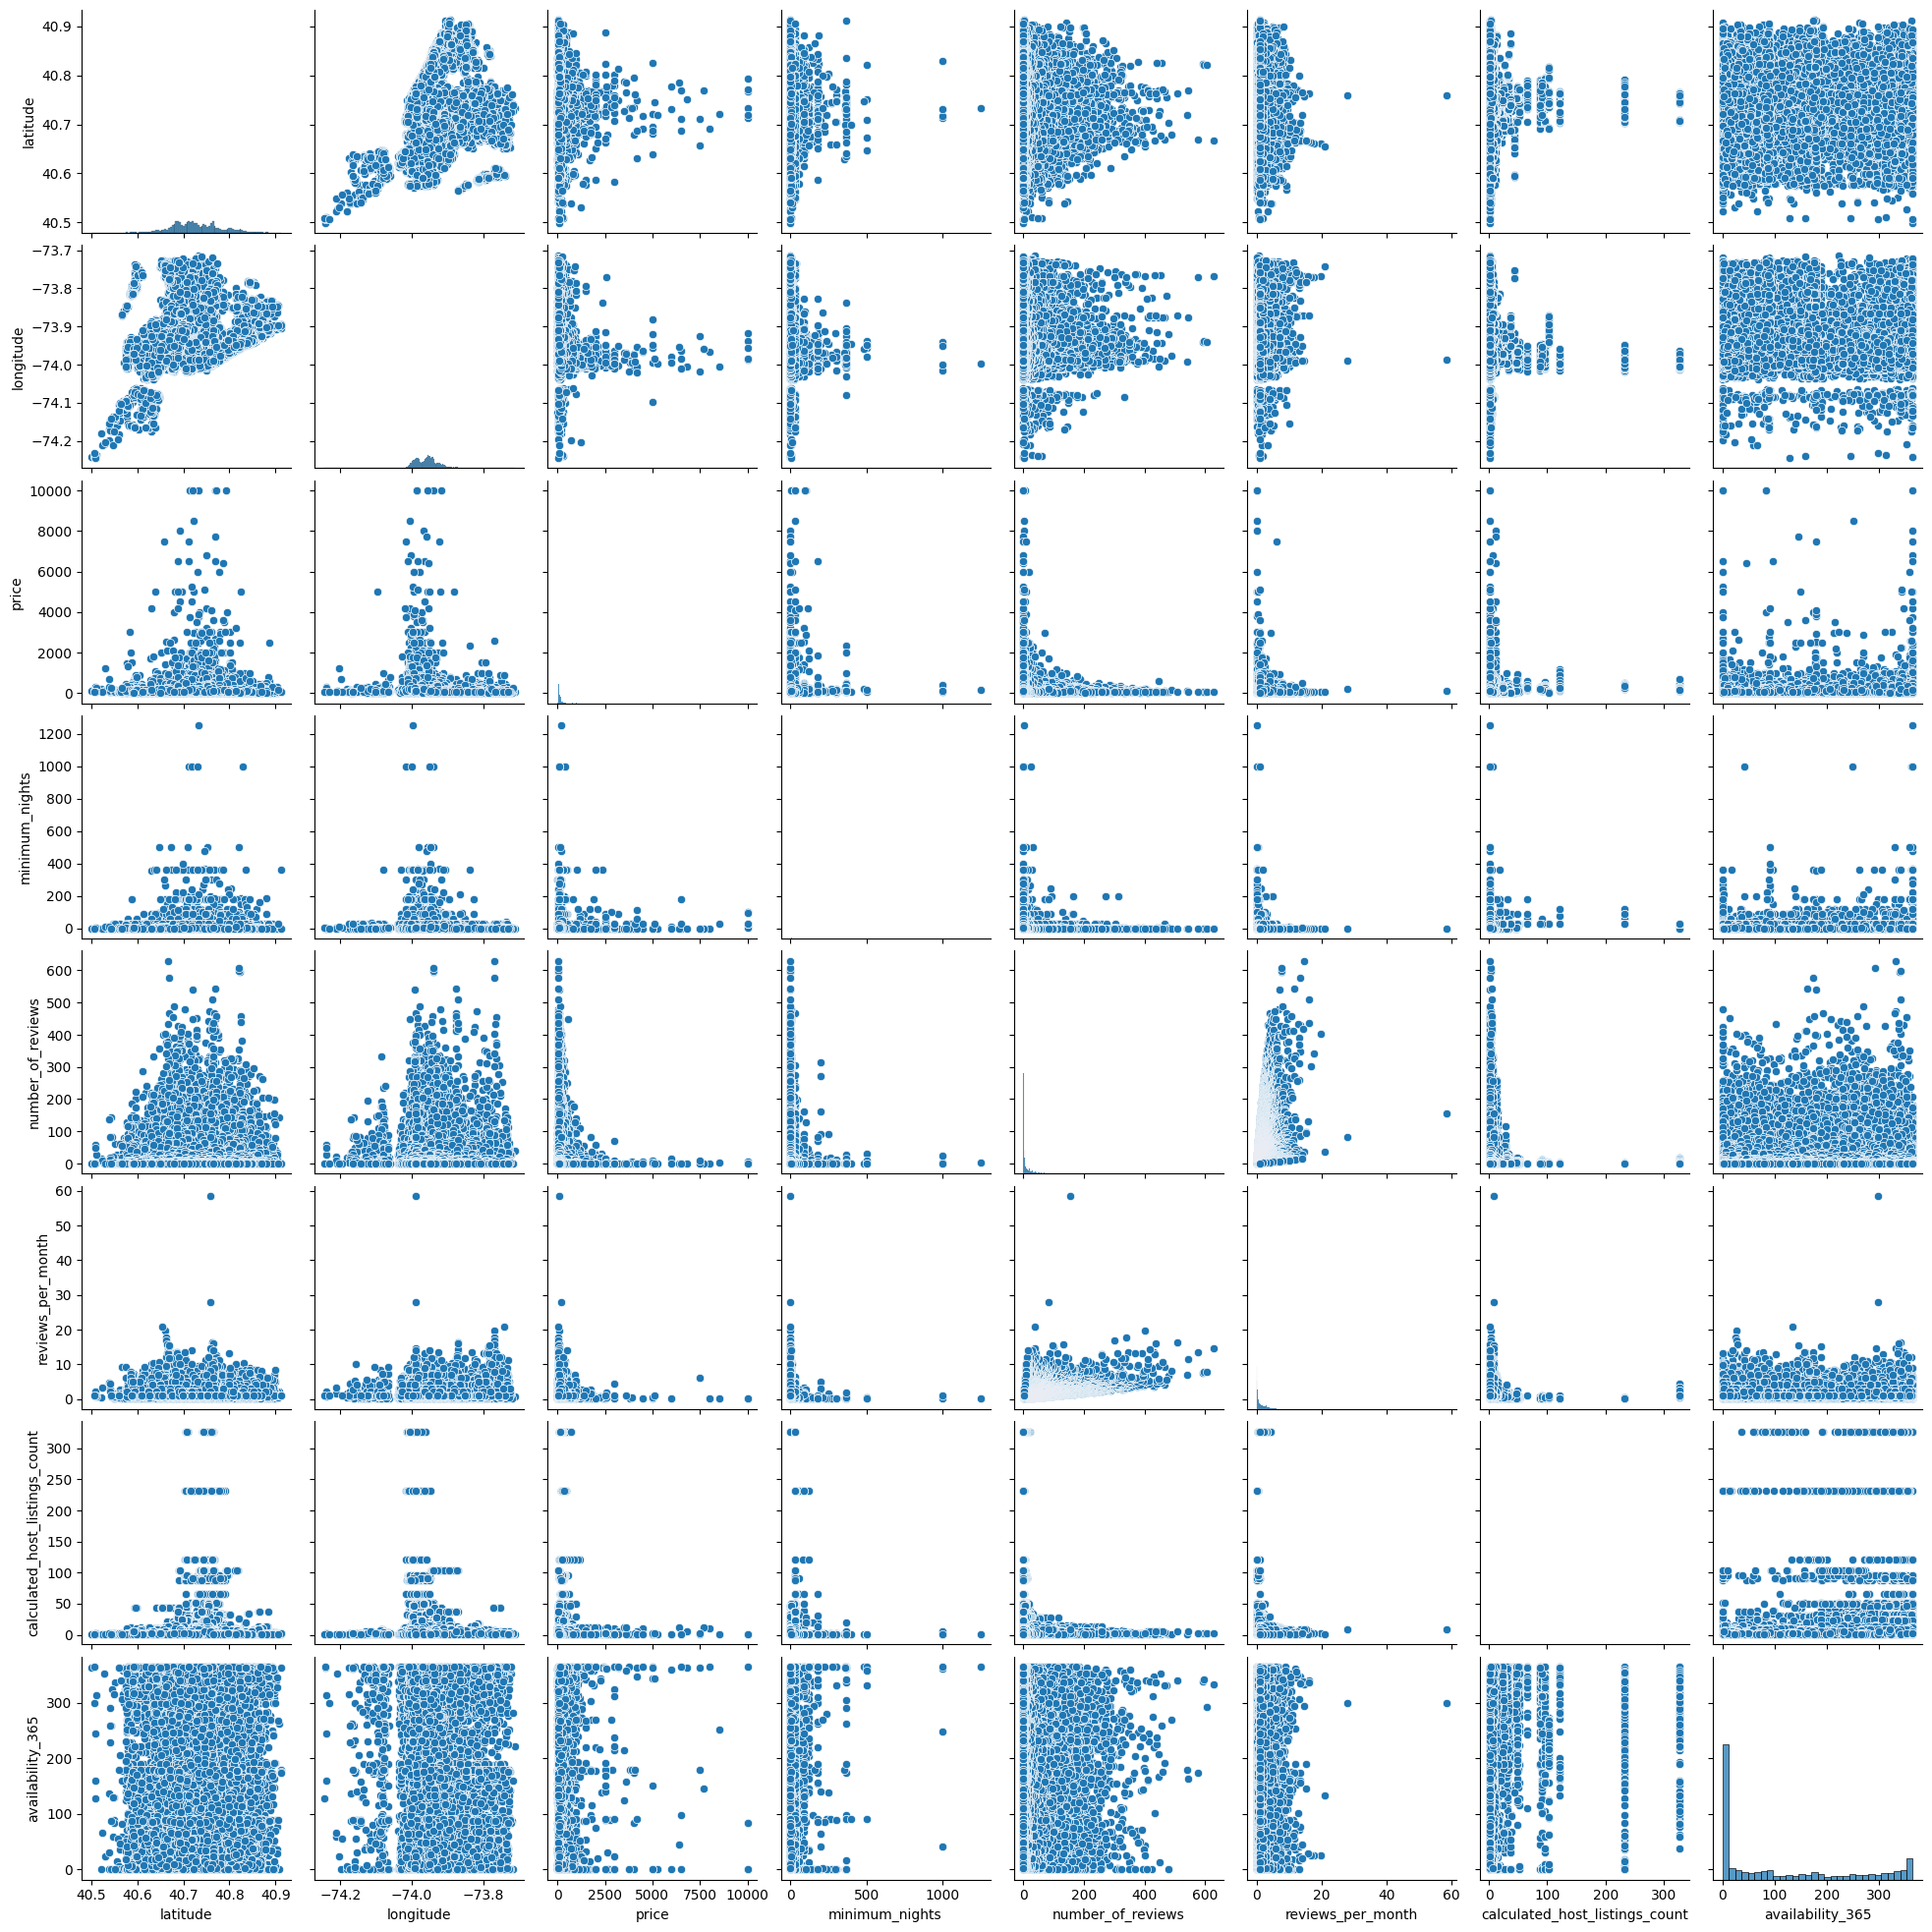

In [21]:
sns.pairplot(data = df)

In [22]:
#Finding price outliers

price_stats = df["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

<Axes: ylabel='price'>

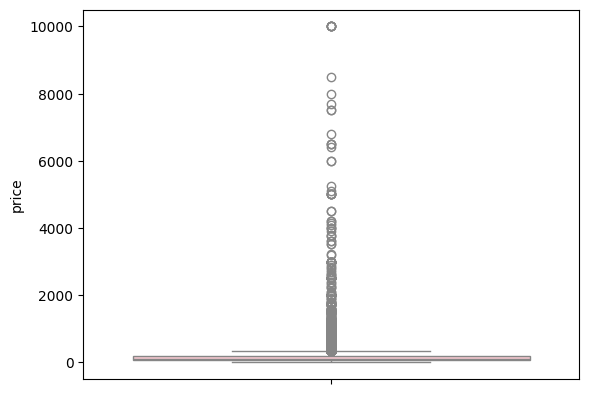

In [23]:
#Box plot for prices

sns.boxplot(df["price"], color="pink")

In [24]:
price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(price_iqr, 2)}")

The upper and lower limits for finding outliers are 334.0 and -90.0, with an interquartile range of 106.0


In [25]:
#Almost 3000 price outliers eliminated
df = df[df["price"]<334]
df.shape

(45918, 12)

In [26]:
# Filling missing dates with the previous valid date
df['last_review'] = df['last_review'].fillna(method='ffill')

/tmp/ipykernel_1825/3525488297.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['last_review'] = df['last_review'].fillna(method='ffill')
/tmp/ipykernel_1825/3525488297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_review'] = df['last_review'].fillna(method='ffill')


In [27]:
# Filling missing numerical data with column means
for col in df_numerical.columns:
    df_numerical[col].fillna(df_numerical[col].mean(), inplace=True)

/tmp/ipykernel_1825/3973226778.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_numerical[col].fillna(df_numerical[col].mean(), inplace=True)


In [28]:
# Checking for remaining NaN values
print(df_numerical.isna().sum().sort_values(ascending=False)/len(df))

latitude                          0.0
longitude                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64


In [29]:
#Importing SKLearn Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.feature_selection import f_classif, SelectKBest

In [30]:
#Predicting the price of houses by splitting de dataset
numerical_var = [i for i in df_numerical if i != "price"]

# We divide the dataset into training and test samples
X = df_numerical.drop("price", axis = 1)

y = df_numerical["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 39116 entries, 32645 to 15795
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        39116 non-null  float64
 1   longitude                       39116 non-null  float64
 2   minimum_nights                  39116 non-null  int64  
 3   number_of_reviews               39116 non-null  int64  
 4   reviews_per_month               39116 non-null  float64
 5   calculated_host_listings_count  39116 non-null  int64  
 6   availability_365                39116 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 2.4 MB
None


In [32]:
#Min-Max scaling
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [33]:
# Transforming training data
X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = numerical_var)

In [34]:
# Transforming testing data
X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = numerical_var)

In [35]:
print(X_train_scal.head())

       latitude  longitude  minimum_nights  number_of_reviews  \
32645  0.522612   0.542691        0.001601           0.017488   
23615  0.845404   0.570660        0.000801           0.003180   
31183  0.460087   0.534821        0.000801           0.000000   
29260  0.446391   0.588212        0.001601           0.138315   
7275   0.598301   0.655286        0.003203           0.020668   

       reviews_per_month  calculated_host_listings_count  availability_365  
32645           0.014703                        0.000000          0.002740  
23615           0.002565                        0.000000          0.000000  
31183           0.023307                        0.003067          0.000000  
29260           0.083775                        0.000000          0.731507  
7275            0.004103                        0.000000          0.000000  


In [36]:
print(X_train_scal.isna().sum())

latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [37]:
print(X_train_scal.info())

<class 'pandas.core.frame.DataFrame'>
Index: 39116 entries, 32645 to 15795
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        39116 non-null  float64
 1   longitude                       39116 non-null  float64
 2   minimum_nights                  39116 non-null  float64
 3   number_of_reviews               39116 non-null  float64
 4   reviews_per_month               39116 non-null  float64
 5   calculated_host_listings_count  39116 non-null  float64
 6   availability_365                39116 non-null  float64
dtypes: float64(7)
memory usage: 2.4 MB
None


In [38]:
print(X_test_scal.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9779 entries, 879 to 1023
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        9779 non-null   float64
 1   longitude                       9779 non-null   float64
 2   minimum_nights                  9779 non-null   float64
 3   number_of_reviews               9779 non-null   float64
 4   reviews_per_month               9779 non-null   float64
 5   calculated_host_listings_count  9779 non-null   float64
 6   availability_365                9779 non-null   float64
dtypes: float64(7)
memory usage: 611.2 KB
None


In [39]:
# With a value of k = 5 we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

In [40]:
print(X_train_sel.head())

   longitude  minimum_nights  number_of_reviews  \
0  -73.95530             3.0               11.0   
1  -73.94048             2.0                2.0   
2  -73.95947             2.0                0.0   
3  -73.93118             3.0               87.0   
4  -73.89564             5.0               13.0   

   calculated_host_listings_count  availability_365  
0                             1.0               1.0  
1                             1.0               0.0  
2                             2.0               0.0  
3                             1.0             267.0  
4                             1.0               0.0  


In [41]:
print(X_test_sel.head())

   longitude  minimum_nights  number_of_reviews  \
0  -73.97777             3.0               62.0   
1  -73.90779            21.0                0.0   
2  -73.99016             2.0               17.0   
3  -74.01050             2.0                5.0   
4  -73.93287             2.0               30.0   

   calculated_host_listings_count  availability_365  
0                             1.0             189.0  
1                             1.0              73.0  
2                             1.0               0.0  
3                           327.0             272.0  
4                             1.0              30.0  


In [43]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)

X_train_sel.to_csv("/workspaces/machine-learning-python-template/data/raw/clean_NYC_realestate_train.csv", index=False)
X_test_sel.to_csv("/workspaces/machine-learning-python-template/data/raw/clean_NYC_realestate_test.csv", index=False)
